# Use SpatialMap for cell typing (under new cell type discovery)

In [1]:
import warnings
warnings.filterwarnings('ignore')

from SpatialMap import SpatialMap

In [2]:
# For new cell type discovery, set new=True
# For more details about SpatialMap's parameters, see  SpatialMap.py
# Notice: Training GAN is unstable and highly dependent on hyperparameter choices, architecture design, and training strategies
model=SpatialMap.SpatialMap(sc_file='./Data/MOP_1_1_reference.h5ad',
                            srt_file='./Data/MOP_1_1_target_novel.h5ad',
                            new=True,
                            device='cuda:2')

In [3]:
model.pretrain()

Epoch 1, Loss: 2.7653,  CLSLoss: 1.1716, RECLoss: 1.5937, Train_acc: 0.6503
Epoch 2, Loss: 1.0790,  CLSLoss: 0.1692, RECLoss: 0.9099, Train_acc: 0.9439
Epoch 3, Loss: 0.6773,  CLSLoss: 0.0536, RECLoss: 0.6237, Train_acc: 0.9700
Epoch 4, Loss: 0.5156,  CLSLoss: 0.0355, RECLoss: 0.4801, Train_acc: 0.9745
Epoch 5, Loss: 0.4100,  CLSLoss: 0.0298, RECLoss: 0.3801, Train_acc: 0.9764
Epoch 6, Loss: 0.3342,  CLSLoss: 0.0265, RECLoss: 0.3077, Train_acc: 0.9775
Epoch 7, Loss: 0.2822,  CLSLoss: 0.0246, RECLoss: 0.2576, Train_acc: 0.9782
Epoch 8, Loss: 0.2441,  CLSLoss: 0.0234, RECLoss: 0.2207, Train_acc: 0.9790
Epoch 9, Loss: 0.2136,  CLSLoss: 0.0221, RECLoss: 0.1916, Train_acc: 0.9793
Epoch 10, Loss: 0.1894,  CLSLoss: 0.0214, RECLoss: 0.1681, Train_acc: 0.9797
Epoch 11, Loss: 0.1691,  CLSLoss: 0.0205, RECLoss: 0.1487, Train_acc: 0.9798
Epoch 12, Loss: 0.1522,  CLSLoss: 0.0196, RECLoss: 0.1326, Train_acc: 0.9803
Epoch 13, Loss: 0.1377,  CLSLoss: 0.0191, RECLoss: 0.1186, Train_acc: 0.9807
Epoch 14

In [4]:
model.pretrain_GAN()

finished


In [5]:
model.pseudo_label()

(array([ 1, -1, 11, ..., -1,  0, -1]),
 array([ True, False,  True, ..., False,  True, False]))

In [6]:
pre=model.annotate()

Computing METIS partitioning...
Done!


Epoch 1, Loss: 3.0580
Epoch 2, Loss: 2.8769
Epoch 3, Loss: 2.6922
Epoch 4, Loss: 2.5209
Epoch 5, Loss: 2.3389
Epoch 6, Loss: 2.1680
Epoch 7, Loss: 2.0073
Epoch 8, Loss: 1.8500
Epoch 9, Loss: 1.7021
Epoch 10, Loss: 1.5646
Epoch 11, Loss: 1.4375
Epoch 12, Loss: 1.3137
Epoch 13, Loss: 1.2032
Epoch 14, Loss: 1.1052
Epoch 15, Loss: 1.0072
Epoch 16, Loss: 0.9255
Epoch 17, Loss: 0.8490
Epoch 18, Loss: 0.7808
Epoch 19, Loss: 0.7223
Epoch 20, Loss: 0.6696
Epoch 21, Loss: 0.6198
Epoch 22, Loss: 0.5760
Epoch 23, Loss: 0.5378
Epoch 24, Loss: 0.5027
Epoch 25, Loss: 0.4708
Epoch 26, Loss: 0.4441
Epoch 27, Loss: 0.4178
Epoch 28, Loss: 0.3946
Epoch 29, Loss: 0.3740
Epoch 30, Loss: 0.3551
Epoch 31, Loss: 0.3372
Epoch 32, Loss: 0.3209
Epoch 33, Loss: 0.3064
Epoch 34, Loss: 0.2931
Epoch 35, Loss: 0.2801
Epoch 36, Loss: 0.2690
Epoch 37, Loss: 0.2582
Epoch 38, Loss: 0.2488
Epoch 39, Loss: 0.2392
Epoch 40, Loss: 0.2310
Epoch 41, Loss: 0.2235
Epoch 42, Loss: 0.2162
Epoch 43, Loss: 0.2096
Epoch 44, Loss: 0.20

# Visualization

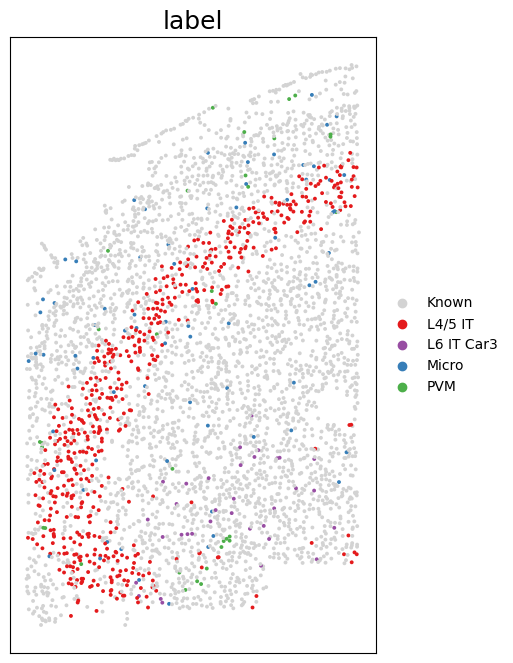

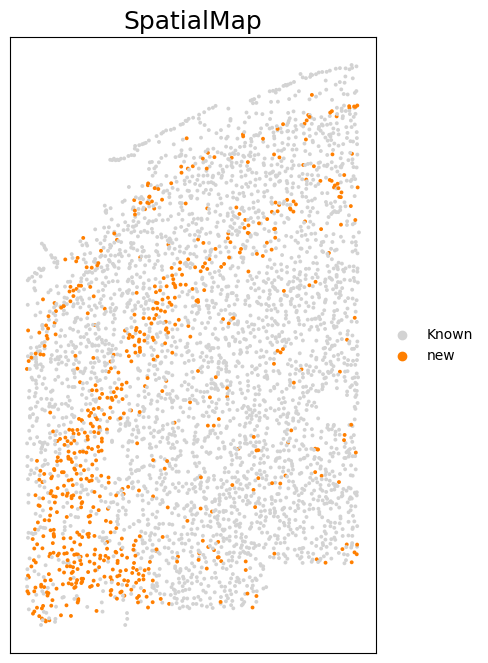

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc

sample=sc.read_h5ad('./Data/MOP_1_1_target_novel.h5ad')
sample.obs['SpatialMap']=pre


sample.obsm['spatial'] = sample.obs[['x', 'y']].to_numpy()

spatial1_min, spatial1_max = 4000, 99999
spatial2_min, spatial2_max = -9999, 1000

selected_indices = (sample.obsm['spatial'][:, 0] >= spatial1_min) & (sample.obsm['spatial'][:, 0] <= spatial1_max) & \
                   (sample.obsm['spatial'][:, 1] >= spatial2_min) & (sample.obsm['spatial'][:, 1] <= spatial2_max)

sample_selected = sample[selected_indices, :]

interested_labels = ['L4/5 IT', 'Micro', 'PVM', 'L6 IT Car3']
novel_labels = ['new'] 

for c in ['label', 'SpatialMap']:
    sample_selected.obs[c] = sample_selected.obs[c].apply(
        lambda x: x if x in interested_labels + novel_labels else 'Known'
    )

colors_of_interest = sns.color_palette("Set1", len(interested_labels) + len(novel_labels))
color_dict = {label: colors_of_interest[i] for i, label in enumerate(interested_labels + novel_labels)}

color_dict['Known'] = 'lightgray'

for c in ['label', 'SpatialMap']:
    fig, ax = plt.subplots(figsize=(8, 8))  
    sc.pl.embedding(
        sample_selected,
        basis='spatial',
        color=c,
        palette=color_dict,
        title=f'{c}',
        ax=ax,  
        show=False
    )
    ax.set_title(f'{c}', fontsize=18)  
    
    legend = ax.get_legend()
    if legend:  
        plt.setp(legend.get_texts(), fontsize=10)  
        legend.set_title(None)  
    ax.set_aspect('equal')
    ax.set_xlabel("")  
    ax.set_ylabel("") 
    plt.show()